# EDA - Exploratory Data Analysis

    The primary goal of EDA is to explore and understand the data, uncovering underlying patterns, identifying anomalies, testing hypotheses, and checking assumptions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_csv(r'C:\Users\jayavaradhan.olivu\OneDrive - DISYS\Documents\Data Science\Data Science - Python\Python Practice\Data source\train - EDA.csv')
df_copy = df.copy()
df.head()
print(f'''
shape: {df.shape}
columns: {df.columns}''')


shape: (1460, 81)
columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

<b> What are the steps that we need to do for EDA?
1. Handling missing values
2. Numerical values
3. distribution of numarical values
4. categorial data
5. outliers
6. relationship between dependent and independent variables
7. correlation

In [ ]:
df.describe()

# 1. Handling missing values

In [4]:
Fetch_NAN = df.isna().sum()
Fetch_NAN = Fetch_NAN[Fetch_NAN > 0]
Fetch_NAN

Missing_values = []
for col in df.columns:
    if df[col].isna().sum() > 0:
        Missing_values.append([col, df[col].isna().sum()])

for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col, np.round(df[col].isnull().mean()*100, 2), '%')
Missing_values

LotFrontage 17.74 %
Alley 93.77 %
MasVnrType 59.73 %
MasVnrArea 0.55 %
BsmtQual 2.53 %
BsmtCond 2.53 %
BsmtExposure 2.6 %
BsmtFinType1 2.53 %
BsmtFinType2 2.6 %
Electrical 0.07 %
FireplaceQu 47.26 %
GarageType 5.55 %
GarageYrBlt 5.55 %
GarageFinish 5.55 %
GarageQual 5.55 %
GarageCond 5.55 %
PoolQC 99.52 %
Fence 80.75 %
MiscFeature 96.3 %


[['LotFrontage', 259],
 ['Alley', 1369],
 ['MasVnrType', 872],
 ['MasVnrArea', 8],
 ['BsmtQual', 37],
 ['BsmtCond', 37],
 ['BsmtExposure', 38],
 ['BsmtFinType1', 37],
 ['BsmtFinType2', 38],
 ['Electrical', 1],
 ['FireplaceQu', 690],
 ['GarageType', 81],
 ['GarageYrBlt', 81],
 ['GarageFinish', 81],
 ['GarageQual', 81],
 ['GarageCond', 81],
 ['PoolQC', 1453],
 ['Fence', 1179],
 ['MiscFeature', 1406]]

# Finding the depending and Independing variables and the Outliers
    plotting the features with missing data aganist the dependent variables

<Axes: xlabel='SalePrice'>

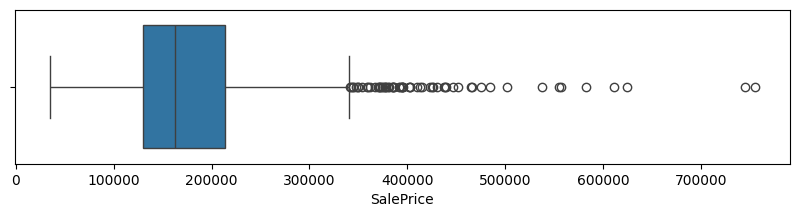

In [5]:
# Based on the given data set the Depending variable is SalePrice 
# how I found it - bascially if you take a look into the data set clearly you could see sale price is determined by all other columns
# so, Sale Price is the depending variable and all others are independent variables

''' Outliers of the dependent variable of Salary Price'''
plt.figure(figsize=(10,2))
sns.boxplot(x=df_copy['SalePrice'])

# finding the Numerical values

In [13]:
num_features = []
for col in df_copy.columns:
     if df_copy[col].dtypes != 'object':
         num_features.append(col)
      
num_features
df_copy[num_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


## Finding the date series

    below is the syntax for List comprehension
    [expression for item in iterable if condition]


In [6]:
date_features = [
    col for col in df_copy.columns 
        if 'Year' in col or 'Yr' in col]
date_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
''' This is the syntax for creating it in dictionary '''
unique_date_features = {col: df_copy[col].unique() for col in df_copy[date_features]}
# unique_date_features = []
# for col in df_copy[date_features]:
#     unique_date_features.append(df_copy[col].unique())
unique_date_features
unique_date_features_total = {col: len(df_copy[col].unique()) for col in df_copy[date_features]}
unique_date_features_total

{'YearBuilt': 112, 'YearRemodAdd': 61, 'GarageYrBlt': 98, 'YrSold': 5}

YrSold
2006    163995.0
2007    167000.0
2008    164000.0
2009    162000.0
2010    155000.0
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'House Price vs Year Sold')

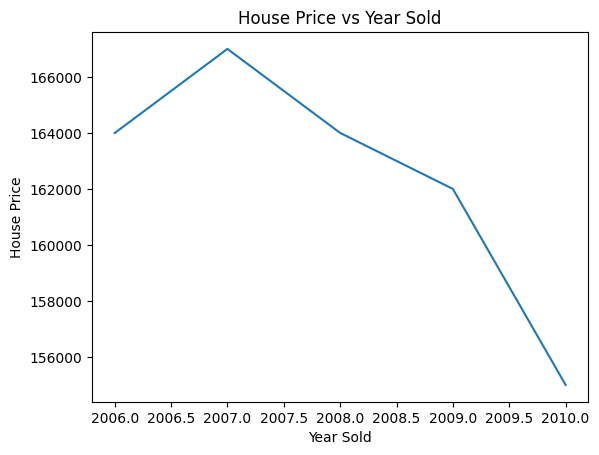

In [11]:
print(df_copy.groupby('YrSold')['SalePrice'].median())
df_copy.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('House Price')
plt.title('House Price vs Year Sold')

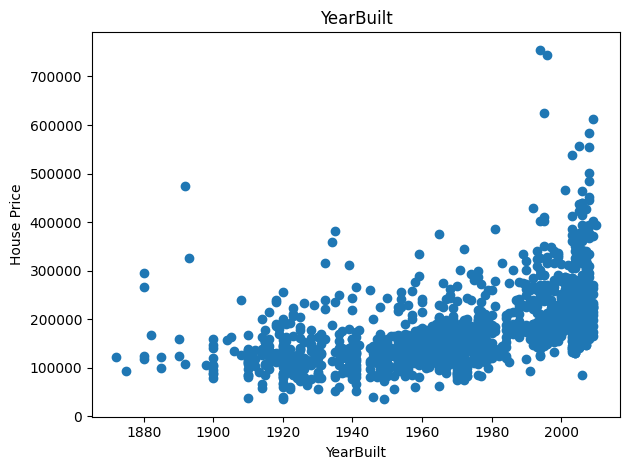

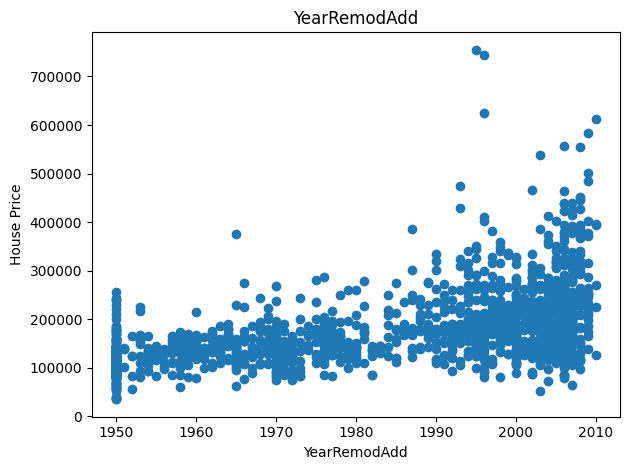

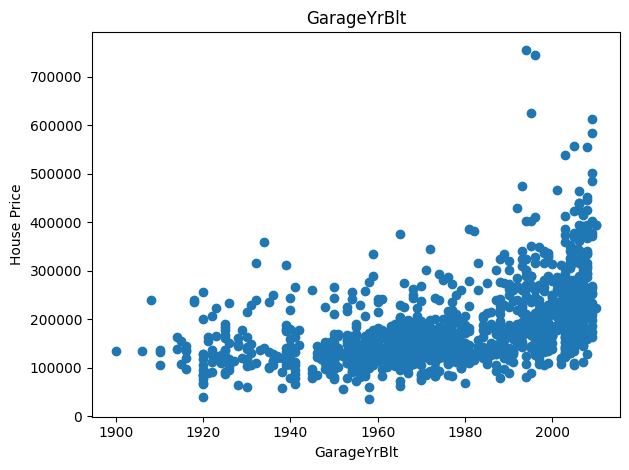

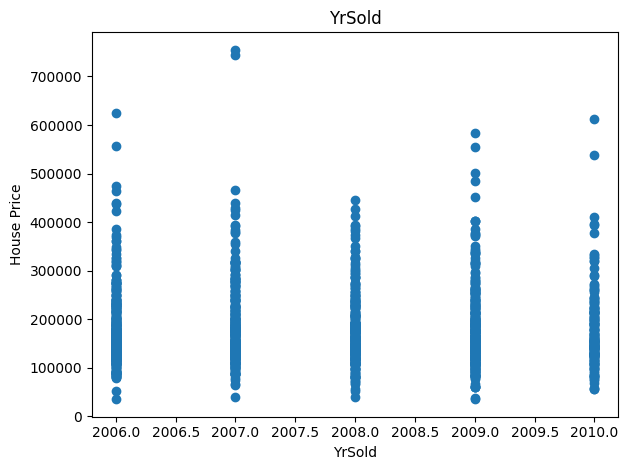

' So based on this analysis YearBulit, YearRemodAdd, GarageYrBlt - house Price was increased based on the timeline'

In [14]:
for col in date_features:
        plt.scatter(df_copy[col], df_copy['SalePrice'])
        plt.xlabel(col)
        plt.ylabel('House Price')
        plt.title(col)
        plt.tight_layout()
        plt.show()
''' So based on this analysis YearBulit, YearRemodAdd, GarageYrBlt - house Price was increased based on the timeline'''

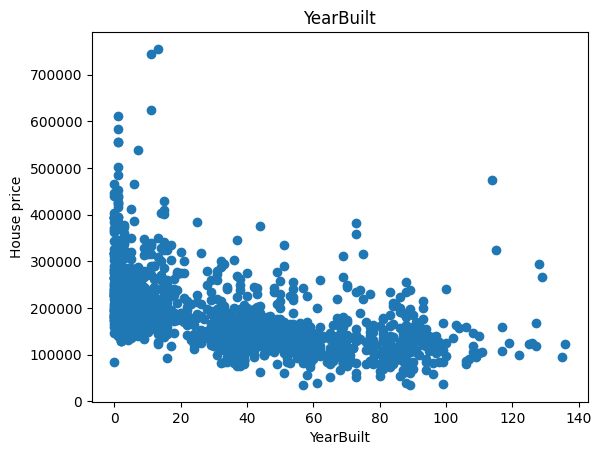

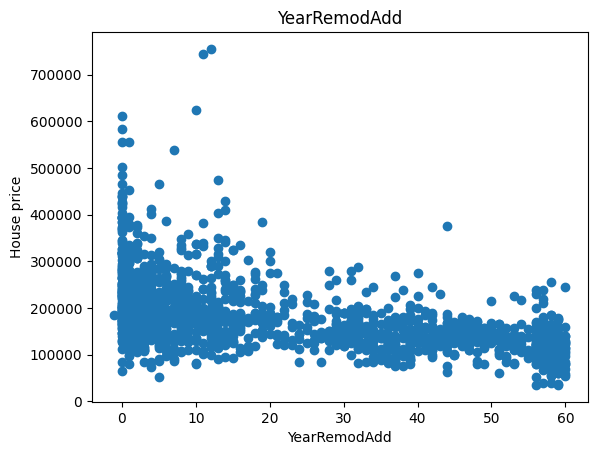

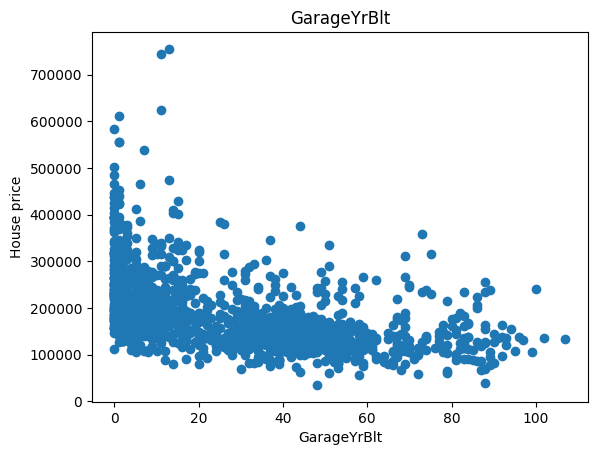

' Please run it tow time '

In [18]:
''' finding the difference in the year and see the increase in prices range '''
for col in df_copy[date_features]:
    if col != 'YrSold':
        df_copy[col] = df_copy['YrSold'] - df_copy[col]  # difference in the year between the year sold and for the remaining columns
        plt.scatter(df_copy[col],df_copy['SalePrice'])        
        plt.xlabel(col)
        plt.ylabel('House price')
        plt.title(col)
        plt.show()
''' Please run it tow time '''

## Finding the Discrete values in the numerical features
    let's assume that less then 25 unique values are consider as discrete - This is just an assumption  this might get vary


In [19]:
discrete = [col for col in df_copy[num_features] if len(df_copy[col].unique()) < 25] 
df_copy[discrete].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


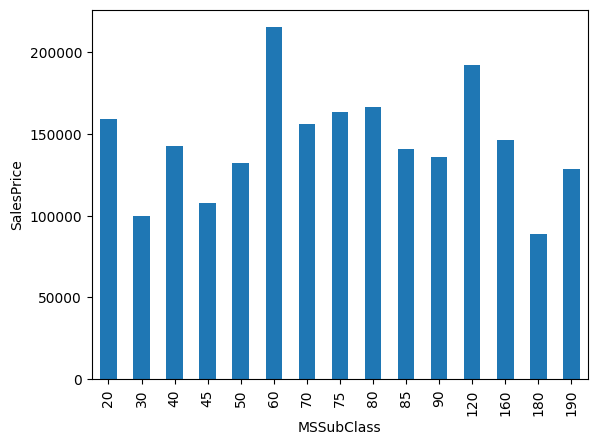

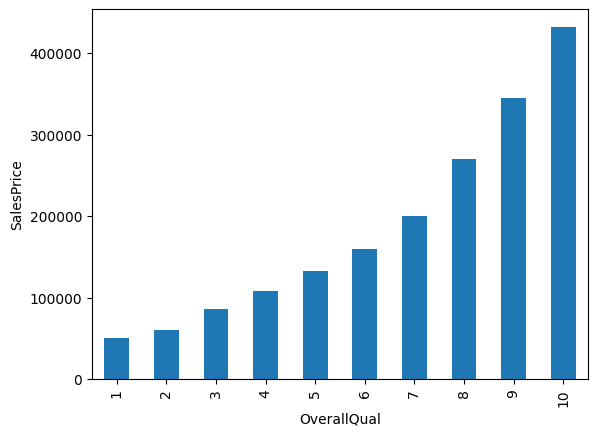

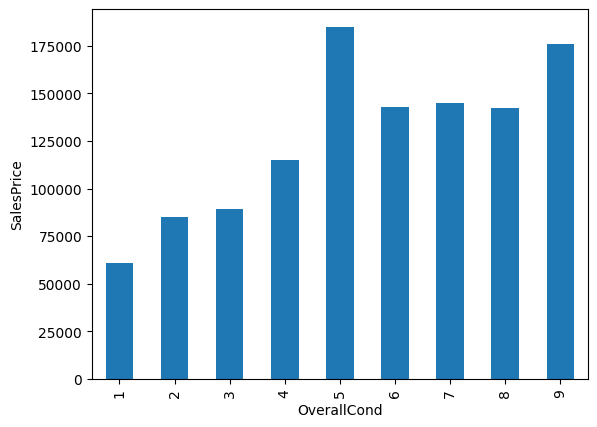

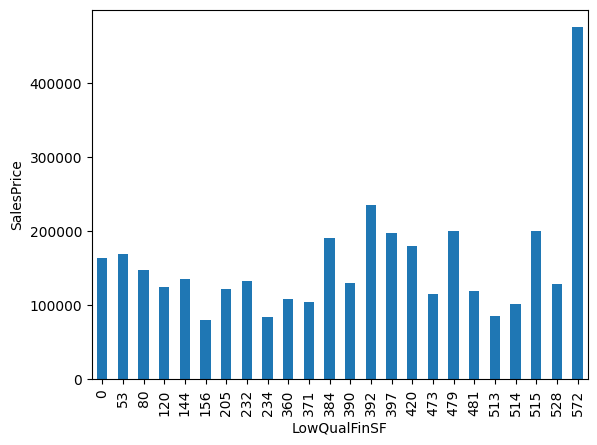

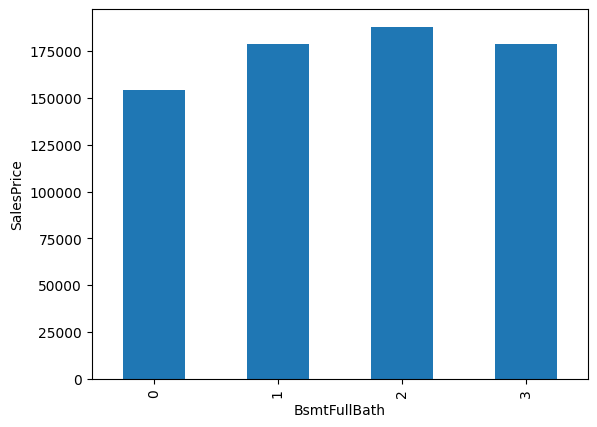

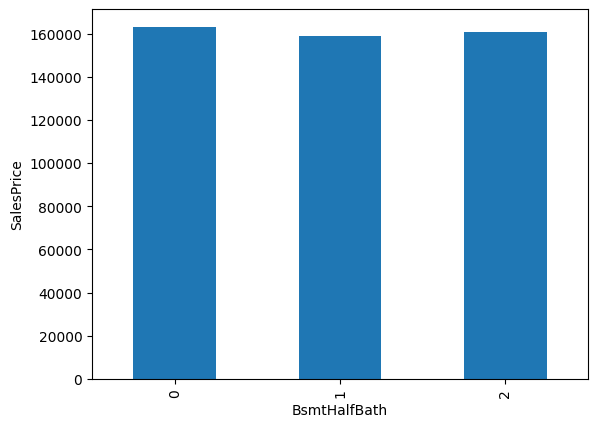

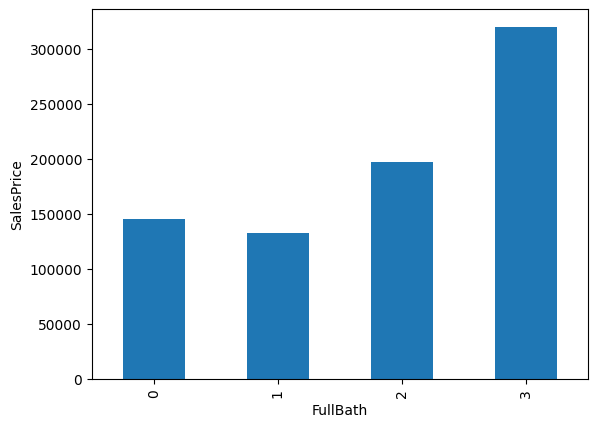

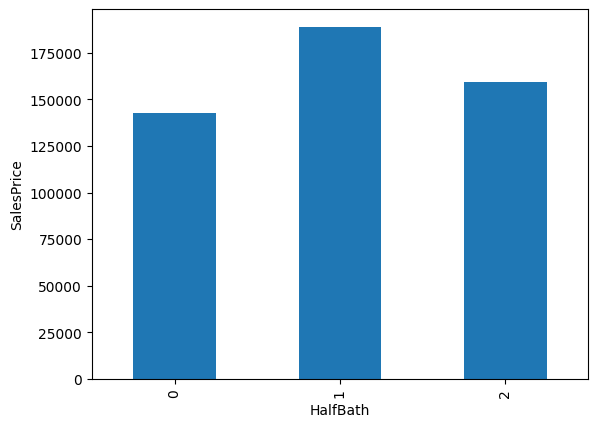

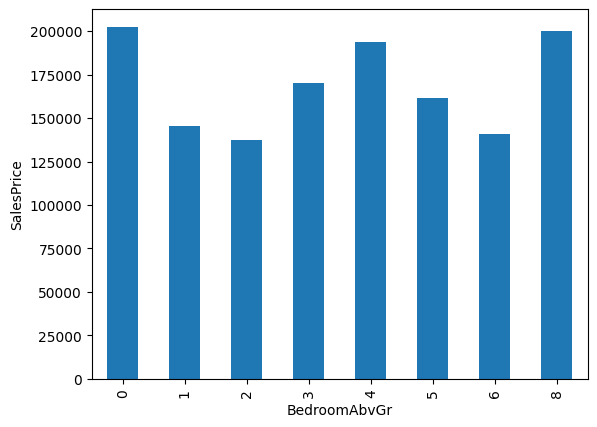

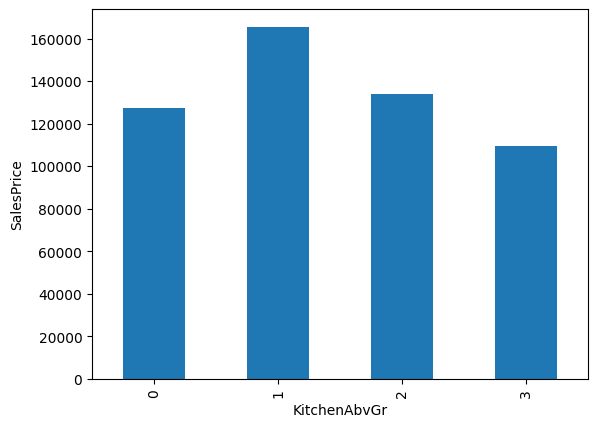

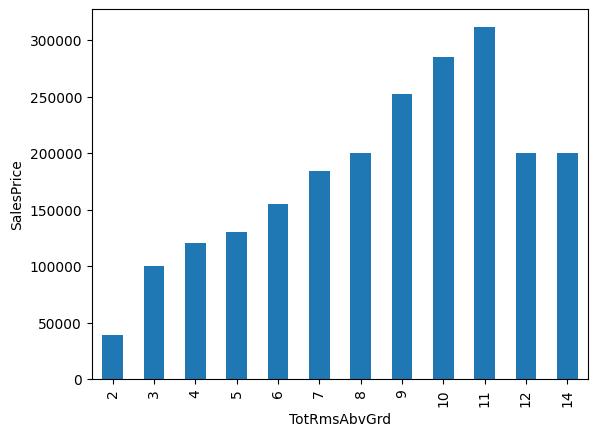

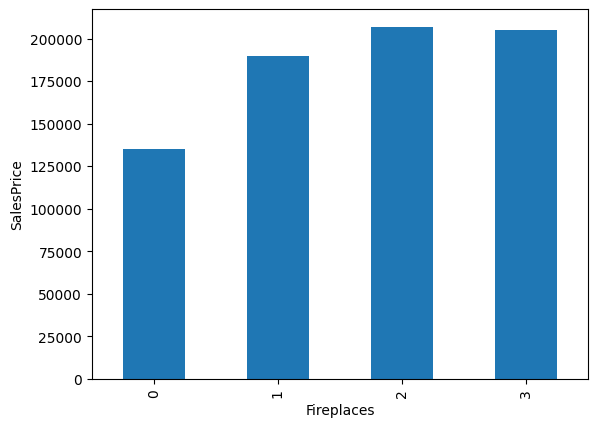

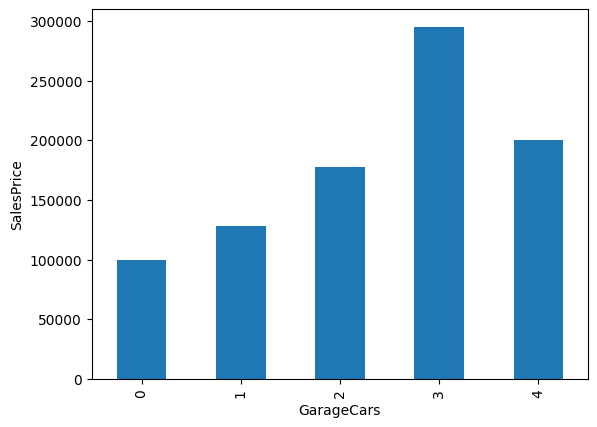

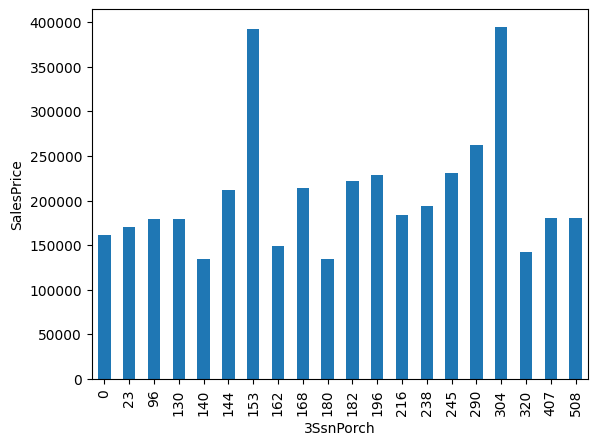

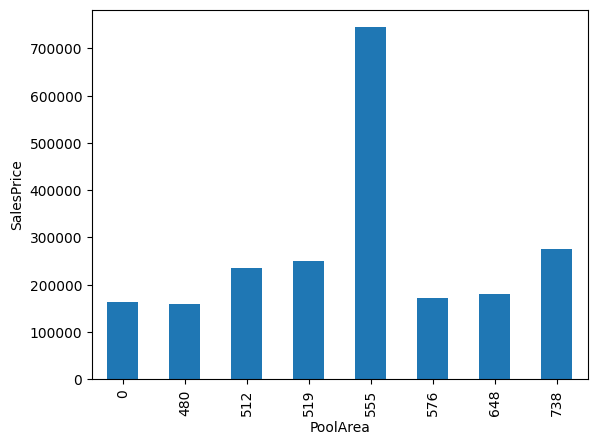

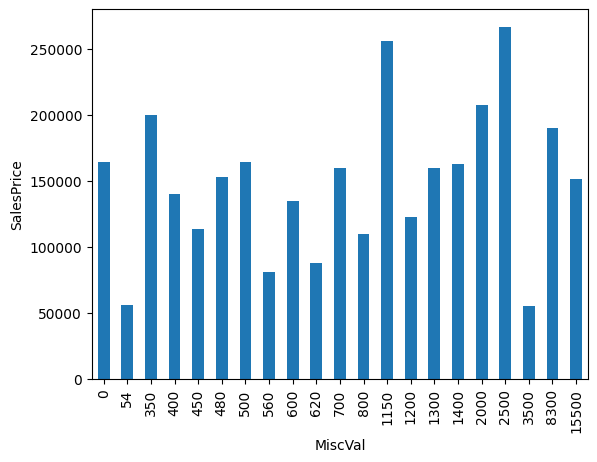

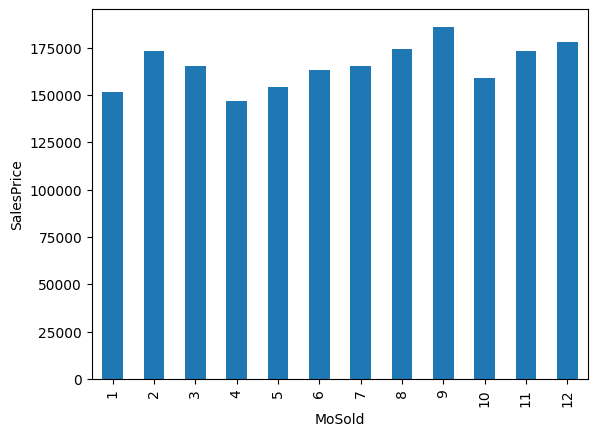

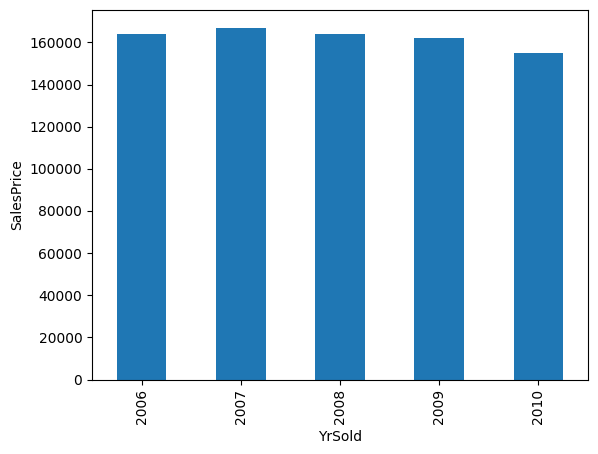

In [20]:
for col in discrete:
    df_copy.groupby(col)['SalePrice'].median().plot.bar()
    plt.ylabel('SalesPrice')
    plt.show()

In [21]:
median_sale_price = df_copy.groupby('OverallCond')['SalePrice'].median().reset_index() 
median_sale_price.columns = ['OverallCond', 'MedianSalePrice'] # definet the column name
median_sale_price.columns

Index(['OverallCond', 'MedianSalePrice'], dtype='object')

In [ ]:
for col in discrete:
    median_sale_price = df_copy.groupby(col)['SalePrice'].median().reset_index()
    median_sale_price.columns = [col, 'median_sale_price']
    plt.figure(figsize=(10, 5))
    sns.barplot(data=median_sale_price, x=col, y='median_sale_price', width=0.5)
    plt.show()

### Finding the continuous features

In [ ]:
continuous = [ col for col in df_copy[num_features] if col not in date_features + discrete]
print(continuous)
print(len(continuous))

In [ ]:
for col in df_copy[continuous]:
    df_copy[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [ ]:
sns.histplot(df_copy['SalePrice'], kde=True)

'''Finding the distibrution'''

# Categorial Features

In [22]:
cat_features = [col for col in df_copy.columns if df_copy[col].dtype == 'object']

df_copy[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for col in df_copy[cat_features]:
    print(f''' This features is {col} and the number of categorial {len(df_copy[col].unique())}''')

In [ ]:
for i in df_copy[cat_features]:
    df_copy.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()

# What is the main purpose of the EDA 

    Understanding the data distribution - how the dependent variable (y) influences the independent variables (x)
    Identifying the missing values
    Detecting the outliers - between the x and y
    And for Assumption